In [ ]:
!jupyter nbconvert --to python nutrition_local.ipynb


[NbConvertApp] Converting notebook nutrition_local.ipynb to python
[NbConvertApp] Writing 10879 bytes to nutrition_local.py


In [ ]:
!pip freeze > requirements.txt

In [2]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 52.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.6 MB/s eta 0:00:00
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement pywin32==310 (from versions: none)
ERROR: No matching distribution found for pywin32==310


In [1]:
import pandas as pd

path = "db_nutrition.csv"

df = pd.read_csv(path)

#前処理

In [2]:
df = df.fillna(0)

In [3]:
df = df.rename(columns={
    'Unnamed: 0': '食品群',
    'Unnamed: 1': '食品番号',
    'Unnamed: 2': '索引番号',
    '単位': "食品名",
    '%': "廃棄率(%)",
    'kJ': "エネルギー(kJ)",
    'kcal': "エネルギー(kcal)",
    '(…………… g ………………)': "水分(g)",
    'Unnamed: 8': 'アミノ酸組成によるたんぱく質(g)',
    'Unnamed: 9': 'たんぱく質(g)',
    'Unnamed: 10': '脂肪酸のトリアシルグリセロール当量(g)',
    'mg': 'コレステロール(mg)',
    '(……………………………… g ……………………………)': '脂質(g)',
    'Unnamed: 13': '利用可能炭水化物(単糖当量)(g)',
    'Unnamed: 14': 'Name1',
    'Unnamed: 15': '利用可能炭水化物(質量計)(g)',
    'Unnamed: 16': '差引き法による利用可能炭水化物(g)',
    'Unnamed: 17': 'Name2',
    'Unnamed: 18': '食物繊維総量(g)',
    'Unnamed: 19': '糖アルコール(g)',
    'Unnamed: 20': '炭水化物(g)',
    'Unnamed: 21': '有機酸(g)',
    'Unnamed: 22': '灰分(g)',
    '(…………………………… mg ……………………………)': 'ナトリウム(mg)',
    'Unnamed: 24': 'カリウム(mg)',
    'Unnamed: 25': 'カルシウム(mg)',
    'Unnamed: 26': 'マグネシウム(mg)',
    'Unnamed: 27': 'リン(mg)',
    'Unnamed: 28': '鉄(mg)',
    'Unnamed: 29': '亜鉛(mg)',
    'Unnamed: 30': '銅(mg)',
    'Unnamed: 31': 'マンガン(mg)',
    'Unnamed: 32': 'Name3',
    '(…………………………………… μg………………………………………)': 'ヨウ素(μg)',
    'Unnamed: 34': 'セレン(μg)',
    'Unnamed: 35': 'クロム(μg)',
    'Unnamed: 36': 'モリブデン(μg)',
    'Unnamed: 37': 'レチノール(μg)',
    'Unnamed: 38': 'a-カロテン(μg)',
    'Unnamed: 39': 'β-カロテン(μg)',
    'Unnamed: 40': 'β-クリプトキサンチン(μg)',
    'Unnamed: 41': 'β-カロテン当量(μg)',
    'Unnamed: 42': 'レチノール活性当量(μg)',
    'Unnamed: 43': 'ビタミンD(μg)',
    '(………… mg …………)': 'a-トコフェロール(mg)',
    'Unnamed: 45': 'β-トコフェロール(mg)',
    'Unnamed: 46': 'γ-トコフェロール(mg)',
    'Unnamed: 47': 'σ-トコフェロール(mg)',
    'μg': 'ビタミンK(μg)',
    '(…………… mg ……………)': 'ビタミンB1(mg)',
    'Unnamed: 50': 'ビタミンB2(mg)',
    'Unnamed: 51': 'ナイアシン(mg)',
    'Unnamed: 52': 'ナイアシン当量(mg)',
    'Unnamed: 53': 'ビタミンB6(mg)',
    '(…… μg……)': 'ビタミンB12(μg)',
    'Unnamed: 55': '葉酸(μg)',
    'mg.1': 'バントテン酸(mg)',
    'μg.1': 'ビオチン(μg)',
    'mg.2': 'ビタミンC(mg)',
    '(……g……)': 'アルコール(g)',
    'Unnamed: 60': '食塩相当量(g)',
    'Unnamed: 61': 'Name4',
    'Unnamed: 62': 'Name5',
    'Unnamed: 63': 'Name6',
    'Unnamed: 64': 'Name7'
})

In [4]:
# 一行目（インデックス0）の削除
df = df.drop(index=0).reset_index(drop=True)

In [5]:
#Name削除
df = df.drop(columns=[col for col in df.columns if 'Name' in col])

In [6]:
# データフレーム内の全てのセルの値で () と - を 置換
df = df.applymap(lambda x: x.replace('(', '').replace(')', '').replace('-', '0').replace('Tr', '0') if isinstance(x, str) else x)

C:\Users\bi23014\AppData\Local\Temp\ipykernel_29072\920767670.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace('(', '').replace(')', '').replace('-', '0').replace('Tr', '0') if isinstance(x, str) else x)


In [7]:
# 空白文字（スペースやタブなど）を含むセルの空白文字を削除
import re

df = df.applymap(lambda x: re.sub(r'\s+', '', x) if isinstance(x, str) else x)

C:\Users\bi23014\AppData\Local\Temp\ipykernel_29072\1478160415.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: re.sub(r'\s+', '', x) if isinstance(x, str) else x)


In [8]:
# すべての列（食品名以外）をfloat型に変換（object型のみ対象）
for col in df.columns:
    if col != '食品名':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# 変換後の型を確認
print(df.dtypes)

食品群                     float64
食品番号                    float64
索引番号                      int64
食品名                      object
廃棄率(%)                    int64
エネルギー(kJ)                 int64
エネルギー(kcal)               int64
水分(g)                   float64
アミノ酸組成によるたんぱく質(g)       float64
たんぱく質(g)                float64
脂肪酸のトリアシルグリセロール当量(g)    float64
コレステロール(mg)               int64
脂質(g)                   float64
利用可能炭水化物(単糖当量)(g)       float64
利用可能炭水化物(質量計)(g)        float64
差引き法による利用可能炭水化物(g)      float64
食物繊維総量(g)               float64
糖アルコール(g)               float64
炭水化物(g)                 float64
有機酸(g)                  float64
灰分(g)                   float64
ナトリウム(mg)                 int64
カリウム(mg)                  int64
カルシウム(mg)                 int64
マグネシウム(mg)                int64
リン(mg)                    int64
鉄(mg)                   float64
亜鉛(mg)                  float64
銅(mg)                   float64
マンガン(mg)                float64
ヨウ素(μg)                 float64
セレン(μg) 

In [9]:
df.to_csv("new_nutrition_db.csv", index=False)

#相関分析

db

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 39135 (\N{CJK UNIFIED IDEOGRAPH-98DF}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 32034 (\N{CJK UNIFIED IDEOGRAPH-7D22}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 24341 (\N{CJK UNIFIED IDEOGRAPH-5F15}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 30058 (\N{CJK UNIFIED IDEOGRAPH-756A}) missing from fon

                           食品群      食品番号      索引番号    廃棄率(%)  エネルギー(kJ)  \
食品群                   1.000000  0.999676  0.105419 -0.063710   0.128231   
食品番号                  0.999676  1.000000  0.110197 -0.060132   0.123468   
索引番号                  0.105419  0.110197  1.000000  0.016388   0.015928   
廃棄率(%)               -0.063710 -0.060132  0.016388  1.000000  -0.207787   
エネルギー(kJ)             0.128231  0.123468  0.015928 -0.207787   1.000000   
エネルギー(kcal)           0.130640  0.125903  0.016828 -0.206557   0.999831   
水分(g)                -0.059369 -0.053596 -0.005265  0.231944  -0.866771   
アミノ酸組成によるたんぱく質(g)     0.070726  0.075182  0.022365  0.034932   0.244819   
たんぱく質(g)              0.090659  0.095851  0.047308  0.042728   0.244337   
脂肪酸のトリアシルグリセロール当量(g)  0.195763  0.193544  0.028274 -0.108797   0.782077   
コレステロール(mg)           0.172369  0.176462  0.018381  0.027810   0.133161   
脂質(g)                 0.199105  0.197038  0.039730 -0.109806   0.792620   
利用可能炭水化物(単糖当量)(g)    -0.1

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 24046 (\N{CJK UNIFIED IDEOGRAPH-5DEE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 12365 (\N{HIRAGANA LETTER KI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 12395 (\N{HIRAGANA LETTER NI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 12424 (\N{HIRAGANA LETTER YO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 12427 (\N{HIRAGANA LETTER RU}) missing from font(s) DejaVu Sans.
  fig.canvas.d

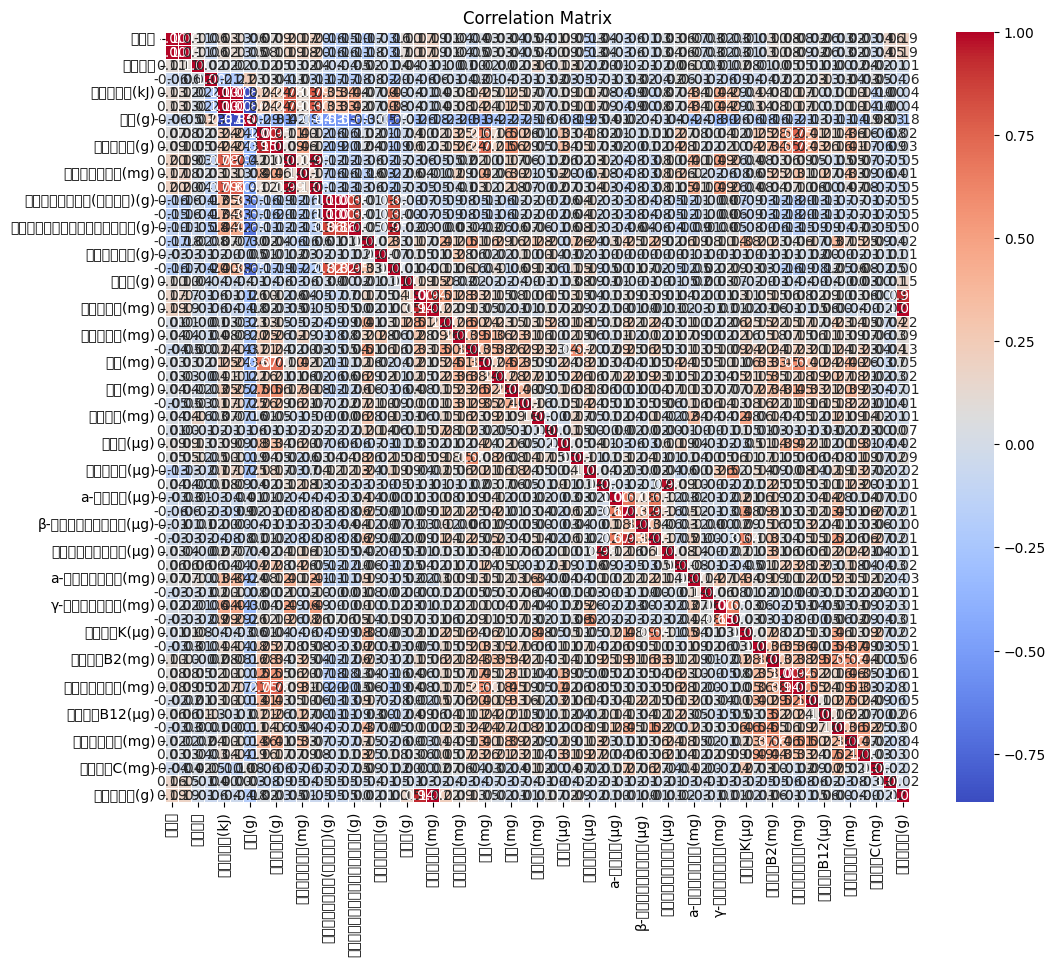

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

# 日本語フォントを明示的に指定
# Windowsの場合の例（MS Gothic）
plt.rcParams['font.family'] = 'MS Gothic'

# 相関行列を計算
df_numeric = df.select_dtypes(exclude=['object'])

correlation_matrix = df_numeric.corr()
pprint(correlation_matrix)
# 相関行列を画像ファイルに保存
correlation_matrix.to_csv("correlation_matrix.txt", sep='\t')


# ヒートマップで可視化
plt.figure(figsize=(12, 10))  # 図のサイズを指定
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix', fontname='MS Gothic')
plt.show()

健康度 計算

可食部100g当たりの食品のデータ

#一日
コレステロール750mg,
ナトリウム4.5g/1000kcal,
脂質25%/ene

#人間は一日2kgの食事をとると仮定

In [ ]:
#式定義　オリジナル式

df["コレステロール(mg)"] / 100 > 750 / 2000
df["ナトリウム(mg)"]*1000 / df["エネルギー(kcal)"] > 4.5 / 1000

df["利用可能炭水化物(質量計)(g)"] / df["エネルギー(kcal)"] > 0.107
df["脂質(g)"] / df["エネルギー(kcal)"] > 0.25
#df['脂肪酸のトリアシルグリセロール当量(g)']
#利用可能炭水化物(単糖当量)(g),利用可能炭水化物(質量計)(g)
#差引き法による利用可能炭水化物(g)
#糖アルコール(g)
##炭水化物(g)

0       False
1       False
2       False
3       False
4       False
        ...  
2533    False
2534    False
2535    False
2536    False
2537    False
Length: 2538, dtype: bool

In [9]:
import pandas as pd

def add_unhealthy_label(df: pd.DataFrame) -> pd.DataFrame:

    cond1 = df["コレステロール(mg)"] / 100 > 750 / 2000
    cond2 = df["ナトリウム(mg)"]*1000 / df["エネルギー(kcal)"] > 4.5 / 1000
    cond3 = df["利用可能炭水化物(質量計)(g)"] / df["エネルギー(kcal)"] > 0.107

    # Trueの合計が2つ以上なら不健康
    conditions_sum = cond1.astype(int) + cond2.astype(int) + cond3.astype(int)
    df["unhealthy"] = (conditions_sum >= 2).astype(int)

    return df


In [10]:
df = add_unhealthy_label(df)
print(df[["unhealthy"]].value_counts())

df.to_csv("feature&label_nutrition_db.csv", index=False)

unhealthy
1            1444
0            1094
Name: count, dtype: int64


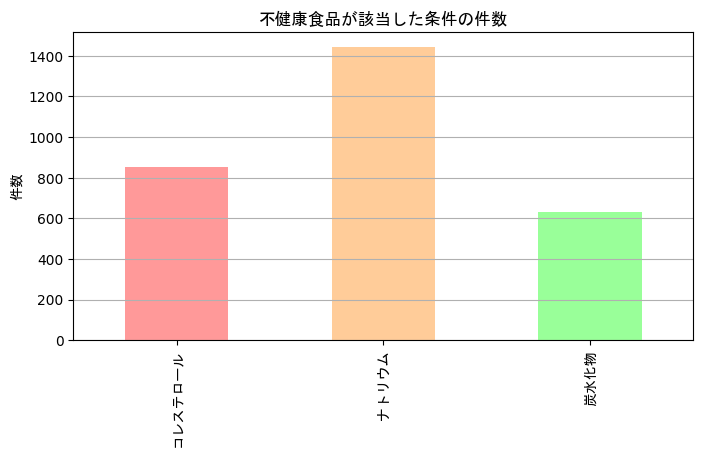

In [22]:
# "unhealthy"が1の行について、どの条件(cond1, cond2, cond3, cond4)に該当しているか可視化

import matplotlib.pyplot as plt

# 条件ごとの判定列を追加
df['cond1'] = (df["コレステロール(mg)"] / 100 > 750 / 2000).astype(int)
df['cond2'] = (df["ナトリウム(mg)"] * 1000 / df["エネルギー(kcal)"] > 4.5 / 1000).astype(int)
df['cond3'] = (df["利用可能炭水化物(質量計)(g)"] / df["エネルギー(kcal)"] > 0.107).astype(int)

# "unhealthy"が1の行だけ抽出
unhealthy_df = df[df["unhealthy"] == 1]

# 各条件に該当している食品数を集計
cond_counts = unhealthy_df[['cond1', 'cond2', 'cond3']].sum()

# 棒グラフで可視化
plt.figure(figsize=(8,4))
cond_counts.plot(kind='bar', color=['#FF9999', '#FFCC99', '#99FF99'])
plt.title('不健康食品が該当した条件の件数', fontname='MS Gothic')
plt.ylabel('件数', fontname='MS Gothic')
plt.xticks([0,1,2], ['コレステロール', 'ナトリウム', '炭水化物'], fontname='MS Gothic')
plt.grid(axis='y')
plt.show()

In [14]:
# "unhealthy"が1の行の食品名だけ表示
print(df.loc[df["unhealthy"] == 1, "食品名"])

0           アマランサス玄穀
1              あわ精白粒
3         えんばくオートミール
4         おおむぎ七分つき押麦
5            おおむぎ押麦乾
            ...     
2528    洋風料理その他えびピラフ
2531    中国料理点心類中華ちまき
2532      中国料理点心類春巻き
2534     中国料理菜類チャーハン
2535       中国料理菜類八宝菜
Name: 食品名, Length: 1444, dtype: object


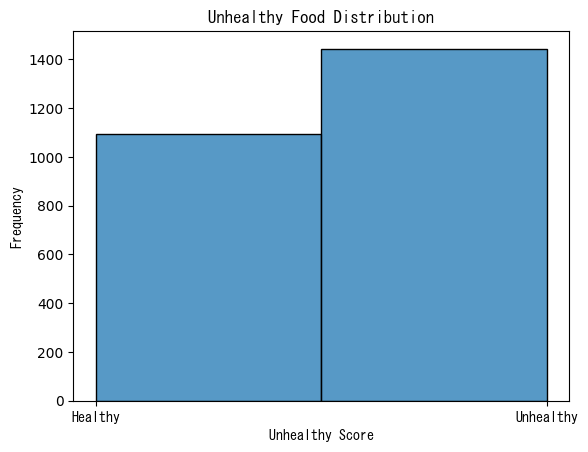

In [15]:
import seaborn as sns
sns.histplot(df["unhealthy"],bins=2)
plt.title('Unhealthy Food Distribution', fontname='MS Gothic')
plt.xlabel('Unhealthy Score', fontname='MS Gothic')
plt.xticks([0, 1], ['Healthy', 'Unhealthy'], fontname='MS Gothic')
plt.ylabel('Frequency', fontname='MS Gothic')
plt.show()

In [ ]:
#fiがtop4
"""
水分(g): 468.0000
"""

In [11]:
from sklearn.model_selection import train_test_split
from transformers.trainer_utils import set_seed

feature_columns = [col for col in df.columns if col not in [
    '炭水化物(g)' ,'糖アルコール(g)', '差引き法による利用可能炭水化物(g)',
    '利用可能炭水化物(質量計)(g)', '利用可能炭水化物(単糖当量)(g)', '脂肪酸のトリアシルグリセロール当量(g)',
    '食品名', '食品群', '食品番号', '索引番号', '廃棄率(%)', 'エネルギー(kJ)', 'コレステロール(mg)',
    '食塩相当量(g)', 'ナトリウム(mg)', '脂質(g)', 'エネルギー(kcal)', 'unhealthy', 'cond1', 'cond2',
    'cond3', '水分(g)'





    ]]
data = df[feature_columns].values
label = df['unhealthy']


set_seed(42)


c:\Users\bi23014\Desktop\Script_jup\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


分類

In [12]:
x_train,x_val,y_train,y_val = train_test_split(data, label, test_size=0.3, random_state=42)

In [13]:
# 欠損値を0で埋める
x_train = pd.DataFrame(x_train).fillna(0).values
x_val = pd.DataFrame(x_val).fillna(0).values

In [15]:
print(y_train[0:10])
print(y_train.shape)
print(df.shape)

1990    1
1456    1
514     1
409     0
2017    0
313     1
1936    1
1017    0
2379    1
916     1
Name: unhealthy, dtype: int64
(1776,)
(2538, 62)


In [16]:
# クラス分布の確認
print(label.value_counts())
print("クラス数:", label.nunique())

unhealthy
1    1444
0    1094
Name: count, dtype: int64
クラス数: 2


In [14]:
x_train

array([[ 9.8, 11. ,  0. , ..., 22. ,  0. ,  0. ],
       [17.5, 21.2,  0. , ...,  8.4, 10. ,  0. ],
       [ 0.5,  0.6,  1.4, ...,  1. , 18. ,  0. ],
       ...,
       [ 0. ,  9. , 53.3, ...,  0. ,  0. ,  0. ],
       [19.5, 21.4,  0. , ..., 15. ,  0. ,  0. ],
       [ 0.6,  0.8,  1.1, ...,  0. ,  5. ,  0. ]], shape=(1776, 40))

#チューニング

In [47]:
!pip install lightgbm

^C


In [25]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

search_gs = {
    'max_depth': [-1, 5, 10],
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_data_in_leaf': [20, 50, 100],
    'min_sum_hessian_in_leaf': [0.001, 0.01, 0.1],


}

model_gs = LGBMClassifier(random_state=42)

gs = GridSearchCV(
    estimator=model_gs,
    param_grid=search_gs,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1

)

gs.fit(x_train, y_train)
print("Best parameters:", gs.best_params_)
print("Best score:", gs.best_score_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.1
[LightGBM] [Info] Number of positive: 1009, number of negative: 767
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001713 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3799
[LightGBM] [Info] Number of data points in the train set: 1776, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.568131

＃学習

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier

model = LGBMClassifier(
                               max_depth=-1,
                               learning_rate=0.1,
                               min_data_in_leaf=20,
                               min_sum_hessian_in_leaf=0.1,
                               num_leaves=50,
                               random_state=42
                            )
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'RandomForest Accuracy:{accuracy:.3f}')

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.1
[LightGBM] [Info] Number of positive: 1009, number of negative: 767
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003946 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3799
[LightGBM] [Info] Number of data points in the train set: 1776, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.568131 -> initscore=0.274228
[LightGBM] [Info] Start training from sco

c:\Users\bi23014\Desktop\Script_jup\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
!pip install pydotplus graphviz

^C



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


＃評価

In [16]:
#score - 汎用性能・テスト性能を測る
y_train_score = model.score(x_train,y_train)
print("Train Score: ", y_train_score)

y_val_score = model.score(x_val,y_val)
print("Validation Score: ", y_val_score)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.1
Train Score:  0.9994369369369369
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.1
Validation Score:  0.8766404199475065


c:\Users\bi23014\Desktop\Script_jup\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\bi23014\Desktop\Script_jup\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.834     0.890     0.861       327
           1      0.913     0.867     0.889       435

    accuracy                          0.877       762
   macro avg      0.873     0.878     0.875       762
weighted avg      0.879     0.877     0.877       762



In [18]:
#特徴量の重要度
fti = model.feature_importances_
print('feature importances:')

sorted_features = sorted(zip(feature_columns, fti), key=lambda x: x[1], reverse=True)

for feat, score in sorted_features:
    print(f"{feat}: {score:.4f}")


feature importances:
食物繊維総量(g): 240.0000
バントテン酸(mg): 234.0000
カリウム(mg): 226.0000
アミノ酸組成によるたんぱく質(g): 222.0000
カルシウム(mg): 215.0000
たんぱく質(g): 213.0000
リン(mg): 213.0000
灰分(g): 205.0000
葉酸(μg): 198.0000
a-トコフェロール(mg): 187.0000
マンガン(mg): 180.0000
ビタミンK(μg): 158.0000
マグネシウム(mg): 156.0000
ビタミンB2(mg): 147.0000
ビオチン(μg): 140.0000
銅(mg): 139.0000
ビタミンB6(mg): 127.0000
ナイアシン当量(mg): 119.0000
鉄(mg): 113.0000
ビタミンB1(mg): 112.0000
ビタミンC(mg): 109.0000
γ-トコフェロール(mg): 108.0000
モリブデン(μg): 105.0000
ナイアシン(mg): 104.0000
β-カロテン当量(μg): 94.0000
レチノール(μg): 92.0000
有機酸(g): 88.0000
β-カロテン(μg): 71.0000
レチノール活性当量(μg): 71.0000
ビタミンB12(μg): 70.0000
亜鉛(mg): 60.0000
クロム(μg): 55.0000
σ-トコフェロール(mg): 51.0000
ヨウ素(μg): 50.0000
β-クリプトキサンチン(μg): 44.0000
セレン(μg): 42.0000
ビタミンD(μg): 42.0000
アルコール(g): 40.0000
a-カロテン(μg): 38.0000
β-トコフェロール(mg): 22.0000


C:\Users\bi23014\AppData\Local\Temp\ipykernel_17820\982344639.py:7: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bi23014\AppData\Local\Temp\ipykernel_17820\982344639.py:7: UserWarning: Glyph 12467 (\N{KATAKANA LETTER KO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bi23014\AppData\Local\Temp\ipykernel_17820\982344639.py:7: UserWarning: Glyph 12501 (\N{KATAKANA LETTER HU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bi23014\AppData\Local\Temp\ipykernel_17820\982344639.py:7: UserWarning: Glyph 12455 (\N{KATAKANA LETTER SMALL E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bi23014\AppData\Local\Temp\ipykernel_17820\982344639.py:7: UserWarning: Glyph 12525 (\N{KATAKANA LETTER RO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bi23014\AppData\Local\Temp\ipykernel_17820\982344639.py:7: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND

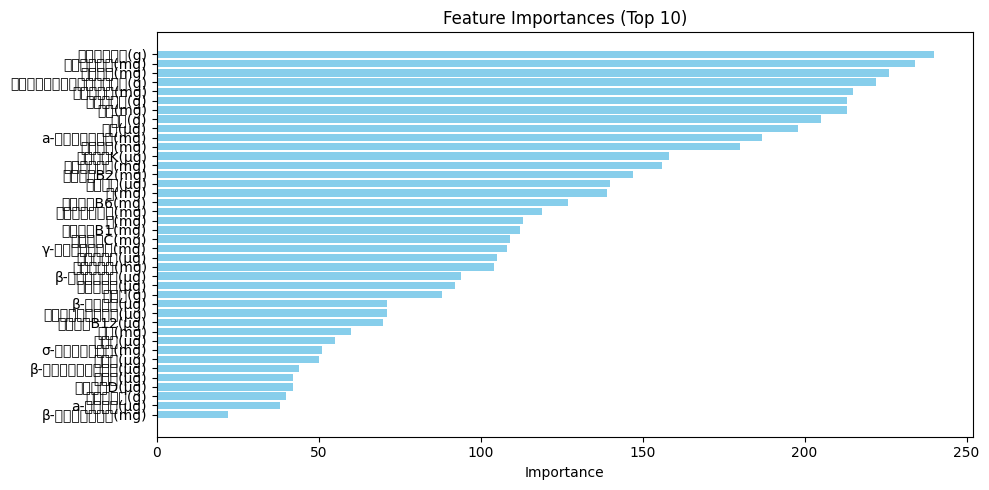

In [30]:
feature_list = [feat for feat, score in sorted_features]
score_list = [score for feat, score in sorted_features]
plt.figure(figsize=(10, 5))
plt.barh(feature_list[::-1], score_list[::-1], color='skyblue')  # 上位が上に来るよう[::-1]
plt.xlabel('Importance')
plt.title('Feature Importances (Top 10)')
plt.tight_layout()
plt.savefig("fi")
plt.show()

In [31]:
# listに格納し記述統計量を計算
import numpy as np

def describe_scores(scores: list):
    print("平均:", np.mean(scores))
    print("中央値:", np.median(scores))
    print("最大値:", np.max(scores))
    print("最小値:", np.min(scores))
    print("標準偏差:", np.std(scores))
    print("分散:", np.var(scores))
    print("四分位数:", np.percentile(scores, [25, 75]))

des_list = [score for feat, score in sorted_features]
describe_scores(des_list)

平均: 122.5
中央値: 110.5
最大値: 240
最小値: 22
標準偏差: 65.11336268386083
分散: 4239.75
四分位数: [ 67.5  181.75]


c:\Users\bi23014\Desktop\Script_jup\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.1
0.9477310274526345


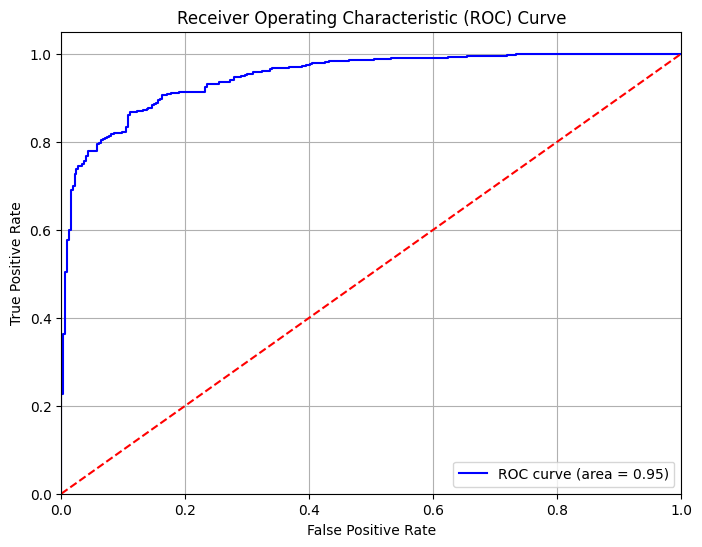

In [32]:
#ROC曲線とAUCの計算
from sklearn.metrics import roc_curve, auc

y_score = model.predict_proba(x_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_score)
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('roc_curve.png')
plt.show()



In [19]:
# 混同行列を計算して表示
cm = confusion_matrix(y_val, y_pred)
# 混同行列をヒートマップとして表示
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Healthy', 'Unhealthy'],
    yticklabels=['Healthy', 'Unhealthy'],
    annot_kws={"size": 10}
    )

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix.png")
plt.show()

NameError: name 'plt' is not defined

In [23]:
# 例：インデックスで指定して個別にモデルの性能評価を行う
idx = 2502  # 評価したいサンプルのインデックス

# 入力データ（特徴量のみ）を取得
sample_x = df.iloc[idx][feature_columns].values.reshape(1, -1)
sample_y = df.iloc[idx]["unhealthy"]
sample_name = df.iloc[idx]["食品名"]

# モデルによる予測
sample_pred = model.predict(sample_x)[0]
sample_proba = model.predict_proba(sample_x)[0][1]  # 不健康クラスの確率

print(f"サンプルID: {idx}")
print(f"食品名: {sample_name}")
print(f"実際のラベル: {sample_y}")
print(f"予測ラベル: {sample_pred}")
print(f"不健康である確率: {sample_proba:.3f}")

# 条件該当状況も表示
print("条件該当状況:")
print(df.iloc[idx][["cond1", "cond2", "cond3"]])

# 重要な特徴量の値も表示（上位5例）
print("上位特徴量とその値:")
for feat, score in sorted_features[:5]:
    print(f"{feat}: {score:.4f}, 値: {df.iloc[idx][feat]}")

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.1
サンプルID: 2502
食品名: 洋風料理カレー類ビーフカレー
実際のラベル: 0
予測ラベル: 1
不健康である確率: 0.668
条件該当状況:
cond1    0
cond2    1
cond3    0
Name: 2502, dtype: object
上位特徴量とその値:
食物繊維総量(g): 240.0000, 値: 0.9
バントテン酸(mg): 234.0000, 値: 0.14
カリウム(mg): 226.0000, 値: 93
アミノ酸組成によるたんぱく質(g): 222.0000, 値: 2.1
カルシウム(mg): 215.0000, 値: 20


c:\Users\bi23014\Desktop\Script_jup\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\bi23014\Desktop\Script_jup\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [24]:
# 例：インデックスで指定して個別にモデルの性能評価を行う
idx = 500  # 評価したいサンプルのインデックス

# 入力データ（特徴量のみ）を取得
sample_x = df.iloc[idx][feature_columns].values.reshape(1, -1)
sample_y = df.iloc[idx]["unhealthy"]
sample_name = df.iloc[idx]["食品名"]

# モデルによる予測
sample_pred = model.predict(sample_x)[0]
sample_proba = model.predict_proba(sample_x)[0][1]  # 不健康クラスの確率

print(f"サンプルID: {idx}")
print(f"食品名: {sample_name}")
print(f"実際のラベル: {sample_y}")
print(f"予測ラベル: {sample_pred}")
print(f"不健康である確率: {sample_proba:.3f}")

# 条件該当状況も表示
print("条件該当状況:")
print(df.iloc[idx][["cond1", "cond2", "cond3"]])

# 重要な特徴量の値も表示（上位5例）
print("上位特徴量とその値:")
for feat, score in sorted_features[:5]:
    print(f"{feat}: {score:.4f}, 値: {df.iloc[idx][feat]}")

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.1
サンプルID: 500
食品名: （えんどう類）グリンピース冷凍ゆで
実際のラベル: 1
予測ラベル: 1
不健康である確率: 0.981
条件該当状況:
cond1    0
cond2    1
cond3    1
Name: 500, dtype: object
上位特徴量とその値:
食物繊維総量(g): 240.0000, 値: 10.3
バントテン酸(mg): 234.0000, 値: 0.36
カリウム(mg): 226.0000, 値: 210
アミノ酸組成によるたんぱく質(g): 222.0000, 値: 4.8
カルシウム(mg): 215.0000, 値: 29


c:\Users\bi23014\Desktop\Script_jup\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\bi23014\Desktop\Script_jup\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [25]:
# 例：インデックスで指定して条件ごとにどの程度閾値を超えているか数値で表示
idx = 2502  # 評価したいサンプルのインデックス

# 閾値
thres1 = 750 / 2000
thres2 = 4.5 / 1000
thres3 = 0.107

# 実際の値
val1 = df.iloc[idx]["コレステロール(mg)"] / 100
val2 = df.iloc[idx]["ナトリウム(mg)"] * 1000 / df.iloc[idx]["エネルギー(kcal)"]
val3 = df.iloc[idx]["利用可能炭水化物(質量計)(g)"] / df.iloc[idx]["エネルギー(kcal)"]

print(f"サンプルID: {idx}, 食品名: {df.iloc[idx]['食品名']}")
print(f"コレステロール: {val1:.4f}（閾値: {thres1:.4f}） 差分: {val1-thres1:.4f}")
print(f"ナトリウム: {val2:.4f}（閾値: {thres2:.4f}） 差分: {val2-thres2:.4f}")
print(f"炭水化物: {val3:.4f}（閾値: {thres3:.4f}） 差分: {val3-thres3:.4f}")

サンプルID: 2502, 食品名: 洋風料理カレー類ビーフカレー
コレステロール: 0.1000（閾値: 0.3750） 差分: -0.2750
ナトリウム: 5714.2857（閾値: 0.0045） 差分: 5714.2812
炭水化物: 0.0479（閾値: 0.1070） 差分: -0.0591
